# Final Project: Earth Analytics Python Course, Spring 2020
## Steph Shepherd & Lauren Herwehe

In [21]:
# Import libraries
import warnings
from glob import glob
import os

import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from geopandas import GeoSeries as gs
from shapely.geometry import Point, Polygon
import urllib.request

import contextily as ctx
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from zipfile import ZipFile

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [2]:
#Download Data
#Ramsar Sites
urllib.request.urlretrieve("https://ndownloader.figshare.com/articles/12217679/versions/1", "12217679.zip")

#et.data.get_data(url='https://ndownloader.figshare.com/articles/12217679/versions/1')

with ZipFile('12217679.zip', 'r') as zipObj:
    zipObj.extractall("ramsar")

#Future dams
#urllib.request.urlretrieve("https://ndownloader.figshare.com/files/22486157", "22486157.zip")

et.data.get_data(url="https://ndownloader.figshare.com/files/22486157")

#with ZipFile('22486157.zip', 'r') as zipObj:
    #zipObj.extractall("FHReD")

'/home/jovyan/earth-analytics/data/earthpy-downloads/future_dams_2015.csv'

In [3]:
# Open the ramsar shapefile with geopandas
ramsar_areas = gpd.read_file(os.path.join("ramsar", "features_publishedPolygon.shp"))

# Check the crs of the ramsar sites
print(ramsar_areas.crs)

# Open the dams csv files with pandas
fname = os.path.join("earthpy-downloads", "future_dams_2015.csv")
df = pd.read_csv(fname)

# Covert the pandas dataframe to a shapefile for plotting
dams_path = os.path.join('final-project-data', 'fhred-proposed-dams')
if not os.path.exists(dams_path):
    os.mkdir(dams_path)
    
geometry = [Point(xy) for xy in zip(df.Lon_Cleaned, df.LAT_cleaned)]
crs = {'init': 'epsg:4326'} 
geo_df = gdf(df, crs=crs, geometry=geometry)
geo_df.to_file(driver='ESRI Shapefile', filename=os.path.join(dams_path, 'proposed_dams.shp'))

proposed_dams = gpd.read_file(os.path.join(dams_path, "proposed_dams.shp"))

epsg:4326


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
# CHOOSING A STUDY AREA
# See how many points overlap with ramsar areas and choose the country with the most overlaps for study area?
# Could possibly make global interactive map with leaflet - http://darribas.org/gds15/content/labs/lab_03.html

# CODE IS TOO SLOW TO ANALYZE ON GLOBAL SCALE - HOW TO SPEED UP
# Pull only the proposed_dam and ramsar_sites columns that we need for analysis?
# Once we choose a study area to zoom in on, clip proposed_dam and ramsar_areas shapefiles to it?

# POTENTIAL CHUNKS TO TURN INTO FUNCTIONS
# Function that analyzes dams & areas by country when you input country name
# Function that tells you how many dams are affected when you input country, continent (but dataset too large), or river basin

In [5]:
# Test with Croatia
# Change the CRS to meters rather than degrees for Croatia
proposed_dams_croat = proposed_dams.to_crs('epsg:3765')
ramsar_areas_croat = ramsar_areas.to_crs('epsg:3765')

# Pull only the data for Croatia
proposed_dams_croat = proposed_dams_croat[proposed_dams_croat['Country'] == "Croatia"]
ramsar_areas_croat = ramsar_areas_croat[ramsar_areas_croat['country_en'] == "Croatia"]

# Pull only the geometry and country columns
proposed_dams_croat = proposed_dams_croat[['geometry', 'Country']]
ramsar_areas_croat = ramsar_areas_croat[['geometry','country_en']]

# Buffer the dams to 5km
proposed_dams_croat['geometry']= proposed_dams_croat.buffer(5000)


# Create a geodataframe of only the intersections
croat_data_intersect = gpd.overlay(ramsar_areas_croat, proposed_dams_croat, how='intersection') # can only use overlay with polgons
croat_data_intersect

,country_en,Country,geometry
0,Croatia,Croatia,"POLYGON ((676211.616 5048274.448, 676209.857 5..."
1,Croatia,Croatia,"POLYGON ((496634.314 5042722.592, 496539.785 5..."
2,Croatia,Croatia,"MULTIPOLYGON (((583614.627 4768499.740, 583614..."
3,Croatia,Croatia,"POLYGON ((574986.538 4765765.263, 574969.398 4..."


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  # This is added back by InteractiveShellApp.init_path()


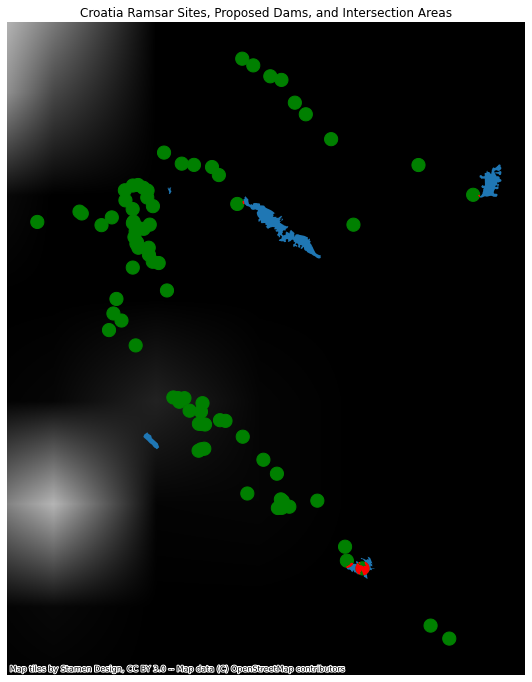

In [25]:
# Create a map of the dams and the ramsar sites for Croatia
# Plot the data
fig, ax = plt.subplots(figsize=(12, 12))
ramsar_areas_croat.plot(ax=ax)
proposed_dams_croat.plot(edgecolor="green",
                    facecolor='green',
                    ax=ax)
croat_data_intersect.plot(edgecolor="red",
                    facecolor='red',
                    ax=ax)
ctx.add_basemap(ax, url=ctx.providers.Stamen.Toner, zoom=1)
ax.set(title='Croatia Ramsar Sites, Proposed Dams, and Intersection Areas')
ax.set_axis_off()


In [15]:
# Try with Guinea
# Change the CRS to meters rather than degrees for Guinea
proposed_dams_guin = proposed_dams.to_crs('epsg:3462')
ramsar_areas_guin = ramsar_areas.to_crs('epsg:3462')

# Pull only the data for Guinea
proposed_dams_guin = proposed_dams_guin[proposed_dams_guin['Country'] == "Guinea"]
ramsar_areas_guin = ramsar_areas_guin[ramsar_areas_guin['country_en'] == "Guinea"]

# Pull only the geometry and country columns
proposed_dams_guin = proposed_dams_guin[['geometry', 'Country']]
ramsar_areas_guin = ramsar_areas_guin[['geometry','country_en']]

# Buffer the dams to 5km and 10km
proposed_dams_guin['geometry']= proposed_dams_guin.buffer(5000)

# PROBLEM - HOW DO WE ADD TWO NEW COLUMNS TO proposed_dams TO STORE 5K AND 10K BUFFERED GEOMETRY?
# proposed_dams_guin['geometry']= proposed_dams_guin.buffer(10000)]

# Create a geodataframe of only the intersections
data_intersect_guin_5k = gpd.overlay(ramsar_areas_guin, proposed_dams_guin, how='intersection') # can only use overlay with polgons
# data_intersect_guin_10k = gpd.overlay(ramsar_areas_guin, proposed_dams_guin_10k, how='intersection')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  # This is added back by InteractiveShellApp.init_path()


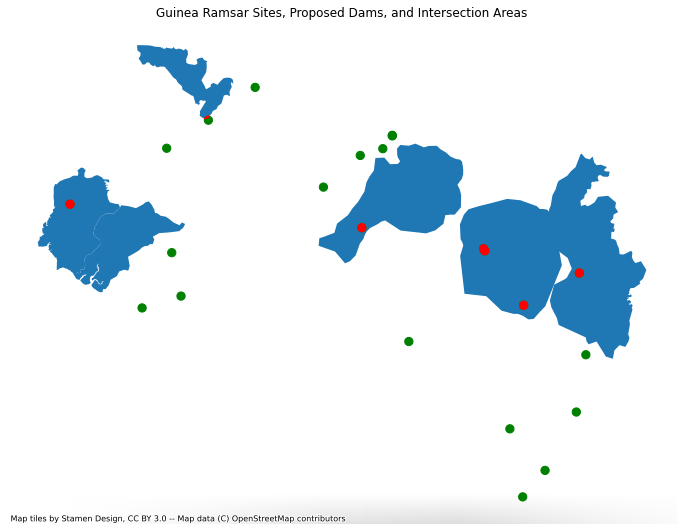

In [24]:
# Create a map of the dams and the ramsar sites for Guinea
# Plot the data
fig, ax = plt.subplots(figsize=(12, 12))
ramsar_areas_guin.plot(ax=ax)
proposed_dams_guin.plot(edgecolor="green",
                    facecolor='green',
                    ax=ax)
data_intersect_guin_5k.plot(edgecolor="red",
                    facecolor='red',
                    ax=ax)
ctx.add_basemap(ax, url=ctx.providers.Stamen.Toner, zoom=0)
ax.set(title='Guinea Ramsar Sites, Proposed Dams, and Intersection Areas')
ax.set_axis_off()

In [9]:
# # PULLING ONLY DATA FOR SOUTH AMERICA TOO SLOW, COULDN'T GET TO WORK
# # Pull only the data for South America
# proposed_dams = proposed_dams[proposed_dams['Continent'] == "South America"]

# # Buffer the dams to 5km
# proposed_dams['geometry']= proposed_dams.buffer(.05)

# # Pull only the geometry and country columns
# proposed_dams = proposed_dams[['geometry', 'Country']]
# ramsar_areas = ramsar_areas[['geometry','country_en']]

# # Create a geodataframe of only the intersections
# data_intersect = gpd.overlay(ramsar_areas, proposed_dams, how='intersection') # can only use overlay with polgons
# data_intersect

# ATTEMPTING TO CREATE INTERACTIVE MAP WITH LEAFLET, DIDN'T WORK
# #import mplleaflet

# f, ax = plt.subplots(figsize=(6, 6))
# # Base layer with all the areas for the background
# for poly in proposed_dams_guin['geometry']:
#     gpd.plotting.plot_multipolygon(ax, poly, facecolor='black', linewidth=0.025)
# # Smallest areas
# for poly in ramsar_areas_guin['geometry']:
#     gpd.plotting.plot_multipolygon(ax, poly, alpha=1, facecolor='red', linewidth=0)
# ax.set_axis_off()
# f.suptitle('Areas with smallest population')
# #mplleaflet.display(fig=f, crs=proposed_dams_guin.crs)
# plt.axis('equal')
# plt.show()


In [10]:
# PLOT - NUMBER OF IMPACTED AREAS PER REGION (continent, country, river basin)

In [ ]:
# PLOT - GRAPH OF NUMBER OF PROPOSED DAMS BY COUNTRY OR YEAR (or bins i.e. decades, continent)?